<a href="https://colab.research.google.com/github/annemiekvdleest/Machine_Learning/blob/main/ML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- look at the statistics of the data (df. describe or something)
- are the data on the same scale (normalizations)
- think about the model space H discussed in class
- browse a bit for which model would work better for the attributes of the data given
- the bias-variance tradeoff
- how can we select the appropriate features
- how best to deal with the nans. 
- coverage, recall, precision

It's always a good idea to have a baseline like autoML then you know what scores you have to improve
https://machinelearningmastery.com/automl-libraries-for-python/


The goal of the Assignment is to predict customers engagement based on certain parameters/features.
0 class means the deals has not started, 1 means in progress and 2 means done/closed 

In [1]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn==0.11.1
!pip install --force-reinstall scipy==1.6
# Restart runtime after installations! 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (3,043 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (T

In [128]:
#import
import pandas as pd
import numpy as np
import matplotlib as plt
import autosklearn 
import scipy
import seaborn as sns
print('autosklearn: %s' % autosklearn.__version__)
print('autosklearn: %s' % scipy.__version__)

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

autosklearn: 0.11.1
autosklearn: 1.6.0


# Data Visualization

Add a random seed to each split of the data to make sure that you get the same validation set (X_test, y_test) every time you execute the above code. In this manner, if you change your model by either changing hyperparameters or ML algorithms and retrain it, you can be assured that any differences happen due to the changes to the model, and not due to having a different random validation set.

In [129]:
df = pd.read_csv('train_data.csv')
seed = np.random.seed()
df.head(10)


,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,23.0,23.0,0.0,4,28,2
1,15427464874523186,9,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,4,21,2
2,53852196172413351,11,10,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,11,2
3,63848905825323247,25,7,2021,NaN,NaN,0.000000,NaN,NaN,81.1167,...,True,True,False,1.0,40.0,12.0,-5.0,3,5,2
4,63848905825323247,1,8,2021,NaN,NaN,6.128259,NaN,283.769836,NaN,...,True,False,False,0.0,40.0,40.0,0.0,3,-1,2
5,68542548700621736,16,1,2021,NaN,1.60,7.257180,NaN,553.204638,182.9300,...,True,False,False,0.0,23.0,23.0,0.0,1,63,2
6,68542548700621736,23,1,2021,NaN,0.03,5.000000,0.03,582.793256,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
7,68542548700621736,30,1,2021,NaN,0.03,0.000000,0.03,NaN,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
8,68542548700621736,6,2,2021,NaN,0.03,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,1,2,2
9,68754075571869139,4,12,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,-1,2


In [5]:
df.describe()

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,sort_order_at_time_of_weekstart,opportunity_probability_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
count,1.593000e+03,1593.000000,1593.000000,1593.000000,82.000000,741.000000,1593.000000,406.000000,495.000000,410.000000,...,1593.000000,1593.000000,1593.000000,1531.000000,1593.000000,1593.000000,1587.000000,1593.000000,1593.000000,1593.000000
mean,4.375875e+18,16.441933,7.168236,2020.433773,1166.524741,30.787129,1.507096,44.678101,520.202313,53.721934,...,7.887633,64.271814,31661.205500,0.182887,28.906466,26.104834,3.315060,2.686127,49.006905,1.492781
std,2.493243e+18,8.594175,3.201259,0.820307,353.240320,71.173149,3.946708,102.548239,212.808827,102.993282,...,6.810652,34.871041,51178.210159,0.513091,10.251028,10.825346,7.561203,1.054145,63.328840,0.748603
min,1.542746e+16,1.000000,1.000000,2018.000000,380.783692,0.030000,0.000000,0.030000,89.957209,0.030000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,-34.000000,1.000000,-14.000000,0.000000
25%,2.454665e+18,9.000000,5.000000,2020.000000,1023.139097,0.030000,0.000000,0.030000,371.625179,0.030000,...,1.000000,30.000000,10000.000000,0.000000,21.000000,17.000000,0.000000,2.000000,9.000000,1.000000
50%,3.809525e+18,17.000000,7.000000,2021.000000,1124.465757,0.060000,0.000000,1.320000,496.952746,2.310000,...,6.000000,75.000000,15000.000000,0.000000,32.000000,27.000000,0.000000,3.000000,25.000000,2.000000
75%,6.652569e+18,24.000000,10.000000,2021.000000,1376.184766,23.605000,0.000000,29.420000,676.483240,60.130000,...,15.000000,95.000000,37800.000000,0.000000,40.000000,34.000000,8.000000,4.000000,62.000000,2.000000
max,9.207329e+18,31.000000,12.000000,2021.000000,1914.532783,609.600000,38.000000,755.082000,1178.973296,623.117000,...,18.000000,100.000000,728750.000000,2.000000,40.000000,40.000000,32.000000,4.000000,327.000000,2.000000


In [6]:
df.sample(5)

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
1184,6591303653861527918,8,11,2021,NaN,NaN,0.00000,1.59,NaN,1.59,...,True,False,False,0.0,23.0,23.0,0.0,4,84,0
885,4245530312715230064,31,8,2021,NaN,NaN,0.00000,NaN,155.665315,0.03,...,True,True,False,NaN,12.0,12.0,0.0,3,21,0
130,1207971539110067735,12,2,2021,NaN,2.55,0.00000,NaN,422.816543,NaN,...,True,True,False,1.0,16.0,16.0,0.0,1,16,2
139,1249524762172193318,20,5,2021,NaN,0.42,5.87367,0.42,806.306191,0.42,...,True,True,False,1.0,40.0,23.0,9.0,2,11,2
172,1482766389029290079,10,9,2021,NaN,NaN,0.00000,NaN,NaN,0.03,...,True,True,False,1.0,40.0,32.0,8.0,3,20,2


2    1032
1     314
0     247
Name: target, dtype: int64


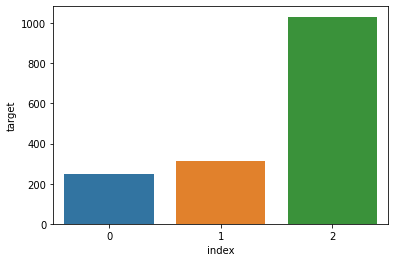

In [7]:
xx = df['target'].value_counts()
print(xx)
sns.barplot(x = 'index', y = 'target', data = xx.reset_index())

As can be seen in the plot above, the dataset is quite imbalanced. This is something that should be taken into account in further processing steps. Because of this imbalanceness, recall would be a better measurement for the performance. 

# Missing Values

In [8]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

opportunity_id                                                          0
current_date_day                                                        0
current_date_month                                                      0
current_date_year                                                       0
TOPICS__mean_calls_Integration__from_opp_creation                    1511
TOPICS__min_calls_Library__last_28_days                               852
QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days       0
TOPICS__min_calls_Collaboration__from_current_stage_start            1187
TOPICS__std_calls_Integrations__last_7_days                          1098
TOPICS__min_calls_Evaluation_Process__from_current_stage_start       1183
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print((total_missing/total_cells) * 100, "%")

56.96160327990977 %


As can be seen above, there are a lot of missing values. 

There are many columns with NaN. If we delete the columns that contain NaNs, then there is almost nothing left. Therefore, we have to deal with those missing values. 

Using the AutoML algorithms, the performance was slightly better (but almost negligible) for using 'bfill' for the missing values than for filling the missing values with zeros. This is also the case when using k_NN.

In [130]:
# Fill NaNs
# df = df.fillna(0) 
df = df.fillna(method = 'bfill', axis=0).fillna(0) # bfill and remaining ones with 0
df.head(10)

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,1086.589123,1.60,0.000000,0.030,283.769836,81.1167,...,True,False,False,0.0,23.0,23.0,0.0,4,28,2
1,15427464874523186,9,11,2021,1086.589123,1.60,0.000000,0.030,283.769836,81.1167,...,True,False,False,0.0,40.0,40.0,17.0,4,21,2
2,53852196172413351,11,10,2021,1086.589123,1.60,0.000000,0.030,283.769836,81.1167,...,True,False,False,0.0,40.0,40.0,0.0,4,11,2
3,63848905825323247,25,7,2021,1086.589123,1.60,0.000000,0.030,283.769836,81.1167,...,True,True,False,1.0,40.0,12.0,-5.0,3,5,2
4,63848905825323247,1,8,2021,1086.589123,1.60,6.128259,0.030,283.769836,182.9300,...,True,False,False,0.0,40.0,40.0,0.0,3,-1,2
5,68542548700621736,16,1,2021,1086.589123,1.60,7.257180,0.030,553.204638,182.9300,...,True,False,False,0.0,23.0,23.0,0.0,1,63,2
6,68542548700621736,23,1,2021,1086.589123,0.03,5.000000,0.030,582.793256,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
7,68542548700621736,30,1,2021,1086.589123,0.03,0.000000,0.030,261.572791,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
8,68542548700621736,6,2,2021,1086.589123,0.03,0.000000,623.117,261.572791,623.1170,...,True,False,False,0.0,40.0,40.0,17.0,1,2,2
9,68754075571869139,4,12,2021,1086.589123,1.35,0.000000,623.117,261.572791,623.1170,...,True,False,False,0.0,40.0,40.0,0.0,4,-1,2


# Normalization and feature selection method

> Now, I just filled NaNs with zeros and picked a feature importance method. It would be good to experiment with this and see how it changes the accuracy / loss. Took largest 50, can also play with this.




In [131]:
# features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,len(df.columns)-1] # y should not be normalized
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
1588    0
1589    0
1590    0
1591    0
1592    2
Name: target, Length: 1593, dtype: int64


Let's see what the performance of all data is with an autoML classifier. 

In [36]:
# auto ML (only replaced NaNs)
# evt. run a few times - take average recall 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from autosklearn.classification import AutoSklearnClassifier
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
# define search
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)

# We can define an AutoSklearnClassifier class that controls the search and configure it to run for two minutes (120 seconds) 
# and kill any single model that takes more than 30 seconds to evaluate. At the end of the run, we can report the statistics 
# of the search and evaluate the best performing model on a holdout dataset.
# https://machinelearningmastery.com/automl-libraries-for-python/ 


auto-sklearn results:
  Dataset name: cbb65f4068bd69e77da933c11edaa809
  Metric: accuracy
  Best validation score: 0.770538
  Number of target algorithm runs: 23
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 17
  Number of target algorithms that exceeded the memory limit: 3

788     2
991     2
978     2
196     1
1088    2
       ..
10      2
560     0
510     1
283     2
47      0
Name: target, Length: 526, dtype: int64
[2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 1 2 2 2 1 0 2 2 1 0 2 2 2 2 2 2 2 2 2 2 1 1
 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 1 2 0 2 1 2 1 1 1 2 1 2 2 1 0 2 0
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 1 1 2 2 2 1 0 2 2 1 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 1 2 0 2 2 1 2 2 2 2
 2 0 2 2 1 2 2 1 

In [37]:
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_hat, average='micro')
print("Recall: %.3f" % recall) # better measure because of the imbalanceness and the nature of the task


Accuracy: 0.778
Recall: 0.778


## Normalization
To make sure the features are in the same range.

In [132]:
# Normalization is useful when your data has varying scales and the algorithm you are using 
# does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
col = X.columns
d = scaler.fit_transform(X)
scaled_X = pd.DataFrame(d, columns=col) #transform back to dataframe
scaled_X.head()

# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# normalization -> kNN 


,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,opportunity_amount_at_time_of_weekstart,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose
0,0.000000,0.033333,0.909091,1.0,0.567548,0.002576,0.00000,0.0,0.17797,0.130179,...,0.026014,0.0,0.0,0.0,0.6,0.575,0.575,0.515152,1.000000,0.123167
1,0.000000,0.266667,0.909091,1.0,0.567548,0.002576,0.00000,0.0,0.17797,0.130179,...,0.058243,0.0,0.0,0.0,0.6,1.000,1.000,0.772727,1.000000,0.102639
2,0.004180,0.333333,0.818182,1.0,0.567548,0.002576,0.00000,0.0,0.17797,0.130179,...,0.001673,0.0,0.0,0.0,0.6,1.000,1.000,0.515152,1.000000,0.073314
3,0.005268,0.800000,0.545455,1.0,0.567548,0.002576,0.00000,0.0,0.17797,0.130179,...,0.013448,0.0,1.0,0.0,0.8,1.000,0.300,0.439394,0.666667,0.055718
4,0.005268,0.000000,0.636364,1.0,0.567548,0.002576,0.16127,0.0,0.17797,0.293572,...,0.013477,0.0,0.0,0.0,0.6,1.000,1.000,0.515152,0.666667,0.038123


In [ ]:
# auto ML scaled data
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=seed)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)


auto-sklearn results:
  Dataset name: 1c129590908bfacce9d5dd542166bf19
  Metric: accuracy
  Best validation score: 0.722380
  Number of target algorithm runs: 24
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 20
  Number of target algorithms that exceeded the memory limit: 2

75      2
698     1
839     2
1485    2
1006    2
       ..
216     0
674     2
395     1
1227    2
503     1
Name: target, Length: 526, dtype: int64
[2 1 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 1 2 2 2 2 1 2
 2 2 2 2 0 2 2 2 2 2 2 0 1 2 2 0 2 2 2 1 1 2 2 2 1 2 0 2 1 2 1 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 1 0 2 1 2 1 2 2 2 1 1 2 2 2 0 2 2 2
 2 1 2 2 2 0 2 2 2 2 0 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 1 2 1 0 2 1 1
 2 2 2 2 0 2 1 2 

In [ ]:
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_hat, average='micro')
print(recall)

Accuracy: 0.751
0.7509505703422054


## Feature selection: Feature Importance Method

The feature importance method gives a recall value of 0.802 (autoML).

[0.00019649 0.01128861 0.00283239 ... 0.001191   0.0027372  0.00999577]


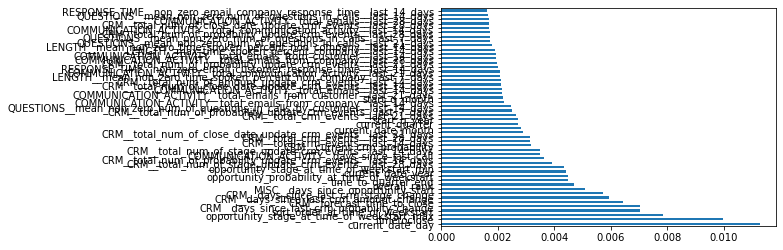

opportunity_id                                       0.000196
current_date_day                                     0.011289
current_date_month                                   0.002832
current_date_year                                    0.004409
TOPICS__mean_calls_Integration__from_opp_creation    0.000063
                                                       ...   
opportunity_stage_at_time_of_weekstart_max           0.007853
opportunity_stage_at_time_of_weekstart_min           0.004351
stage_transition                                     0.001191
current_quarter                                      0.002737
timetoclose                                          0.009996
Length: 2650, dtype: float64


In [133]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# feature importance method

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(scaled_X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()
print(feat_importances)

# target values
X_feat = df[feat_importances.nlargest(50).index]



In [ ]:
# AutoML normalization - pick features - train auto ML

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.33, random_state=seed)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)

auto-sklearn results:
  Dataset name: d1beb50ad20c275620902d171b3d43c1
  Metric: accuracy
  Best validation score: 0.827195
  Number of target algorithm runs: 25
  Number of successful target algorithm runs: 10
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 15
  Number of target algorithms that exceeded the memory limit: 0

792     1
1547    2
540     1
1458    2
501     1
       ..
687     0
619     2
1357    1
1285    1
785     2
Name: target, Length: 526, dtype: int64
[1 2 1 2 1 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 1 2 2 2 2 2 2 2 2
 1 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 2 1 0 0 1 1 0 0 2 0 1 1 1
 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 1 2
 2 2 1 2 2 2 1 2 0 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 2 1 2 0 1 0 2 1 2 2 1 2 1
 1 2 2 2 2 2 2 2 1 2 0 1 2 2 2 2 2 2 1 0 2 2 2 2 1 2 2 1 2 1 2 1 2 1 2 2 2
 1 1 2 2 2 1 2 2

In [ ]:
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_hat, average='micro')
print(recall)

Accuracy: 0.795
0.7946768060836502


### kNN
The recall value is around 0.720.

[0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272, 0.7196652719665272]


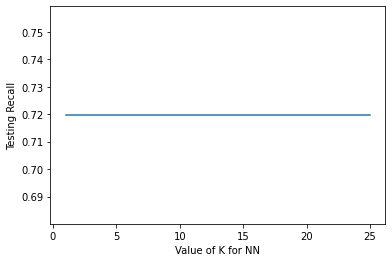

In [20]:
# NN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=seed)

from sklearn.neighbors import KNeighborsClassifier

# clf = KNeighborsClassifier() # what k to use??? hyperparameter! 

# clf.fit(X_train, y_train)

# y_pred_train = clf.predict(X_train)

# y_pred_test = clf.predict(X_test)

# print(y_test)
# print(y_pred_test)

# acc = accuracy_score(y_test, y_pred_test)
# print("Accuracy: %.3f" % acc)
# recall = recall_score(y_test, y_pred_test, average='micro')
# print(recall)

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
  clf = KNeighborsClassifier() 
  clf.fit(X_train, y_train) 
  y_pred_train = clf.predict(X_train) 
  y_pred_test = clf.predict(X_test)
  scores[k] = recall_score(y_test, y_pred_test, average='micro')
  scores_list.append(recall_score(y_test, y_pred_test, average='micro'))

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for NN')
plt.ylabel('Testing Recall')

print(scores_list)

### Linear SVM
First, I tried to apply the SVM algorithm. However, it ran endlessly. This is because the complexity is more than quadratic with the number of samples. Thus, it could be really slow. It was even slow when using the GPU on colab. LinearSCV is another implementation of the Support Vector Classification. It ran much faster, however the performance is much worse. The recall value is around 0.462. 

Therefore, I won't explore this model further. As k-NN has a much better performance. 

In [14]:
# normalize, pick features, train SVM
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=seed) # 70% training and 30% test

#Import svm model
from sklearn.svm import LinearSVC

#Create a svm Classifier
clf = LinearSVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_test)
print(y_pred)

396     2
543     1
323     2
483     1
1046    2
       ..
232     0
118     2
1366    2
1256    2
244     2
Name: target, Length: 478, dtype: int64
[0 0 2 1 0 0 0 0 1 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 0 2
 2 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 2 2 1 0 0 2 0 0 2 0 0 0 2 2 2 2 2 0
 2 0 2 2 0 0 0 0 1 0 1 0 2 0 2 2 1 2 0 2 0 0 0 1 2 0 0 1 1 0 0 0 0 2 0 0 0
 2 2 0 2 0 0 2 2 0 1 0 0 0 1 0 0 2 1 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0 2 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 2 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0
 2 0 0 2 0 0 2 2 0 2 2 2 2 1 0 0 2 2 1 2 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 2 1 1 1 0 2 0 2 1 1 0 0 1 0 0 0 0 2 0 2 0 0 0 1 1 0 0 2 2 2 0 1 0 0 0
 0 0 2 1 0 0 0 2 0 2 0 0 0 0 0 2 1 2 2 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 1 0 0
 0 0 2 1 2 2 0 0 2 2 0 2 1 0 2 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 2 2 0 1
 0 2 1 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 0 2 0 0 0 0 2 0 1 0 0 0 0 2 1 0 1 0 0
 1 0 0 0 2 2 0 2 1 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred, average='micro')
print(recall)

Accuracy: 0.462
0.46234309623430964


### Random Forest Classifier
The performance of this model is significantly better than the models used earlier. The recall value is around 0.830, which is much higher than for the other models. The performance of the Random Forest Classifier is also better than the AutoML I used to get a baseline. 

Therefore, I am going to optimize this model. 

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=seed)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = seed)

# evaluate the model



# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print(y_test)
print(y_pred)

# evaluate the model
from sklearn.metrics import make_scorer, recall_score

scoring = make_scorer(recall_score, average='micro')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results = cross_val_score(rf, 
                          X = X_train, 
                          y = y_train, 
                          cv = cv, 
                          scoring = scoring)
print(results)
print('Recall mean: %.3f (%.3f)' % (np.mean(results), np.std(results)))

acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall: %.3f" % recall)

591     2
335     0
1409    2
472     0
354     2
       ..
51      0
987     1
1185    0
549     1
165     2
Name: target, Length: 478, dtype: int64
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 0 2 2 2 1 1 2 2 2 2
 0 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 0 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2 2 1 0 2 2 2 0 2 2 1 1 2 2 1 2 1 0 2 2 2 2 1 2 2 0 2 2 2 1
 2 2 2 0 1 2 0 2 0 2 1 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 1 2 0 2 2 2 0 2 2 2 1
 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 1 2 2 2 2 0 2 2 1
 2 2 2 1 2 2 2 2 2 2 2 0 2 1 0 1 0 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 1 2 2 2
 0 2 0 1 1 1 2 1 0 2 2 1 0 2 1 2 2 2 1 2 2 1 2 2 0 2 2 2 2 2 1 2 1 0 1 2 2
 2 2 2 2 2 1 1 1 2 0 2 0 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 1 2 1 2 0 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2
 1 2 2 0 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 0 2 2 0 1 1 2 0 2 1 1 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [135]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

#13 min

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.4min finished


{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 100}


In [136]:
# {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 180}
rfc = RandomForestClassifier(n_estimators=400, max_depth=100, max_features='auto')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import make_scorer, recall_score

scoring = make_scorer(recall_score, average='micro')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results = cross_val_score(rfc, 
                          X = X_train, 
                          y = y_train, 
                          cv = cv, 
                          scoring = scoring)
print(results)
print('Recall: %.3f (%.3f)' % (np.mean(results), np.std(results)))

acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall: %.3f" % recall)


[0.83035714 0.89285714 0.75892857 0.79464286 0.77678571 0.82882883
 0.89189189 0.81981982 0.79279279 0.78378378 0.83928571 0.78571429
 0.79464286 0.84821429 0.75       0.83783784 0.8018018  0.76576577
 0.86486486 0.84684685 0.77678571 0.80357143 0.85714286 0.83928571
 0.85714286 0.81081081 0.79279279 0.76576577 0.8018018  0.78378378]
Recall: 0.813 (0.038)
Accuracy: 0.828
Recall: 0.828


## Feature selection: Chi2 Square
Filter-based method

The Chi2 Square method gives a recall value of 0.734 (autoML).
The performance of the feature importance method is significantly higher both for AutoML and kNN, therefore I will work further with the feature importance method. 

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=50)
X_kbest = chi2_selector.fit_transform(scaled_X, y)
# print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

Original number of features: (1593, 2650)
Reduced number of features: (1593, 50)


In [ ]:
# AutoML normalization - pick features - train auto ML

X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.33, random_state=seed)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)

auto-sklearn results:
  Dataset name: 298858c43fbff15d0972c487a33cf966
  Metric: accuracy
  Best validation score: 0.742210
  Number of target algorithm runs: 25
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 13
  Number of target algorithms that exceeded the memory limit: 0

918     2
139     2
688     0
243     1
65      2
       ..
1335    1
43      2
1467    2
1052    2
1165    2
Name: target, Length: 526, dtype: int64
[2 2 1 2 2 2 2 1 2 2 1 1 2 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 2 2 2 2 1 2 2
 2 2 1 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 1 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2
 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 0 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 0 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2 2 2 1 2 2 2 2 2 2 0 2 2 1 2 2 2 2 1 1 2 2 1 0 0 1 2 2 1 2 2 2 2 2 2 1
 1 1 1 2 2 2 2 1

In [ ]:
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_hat, average='micro')
print(recall)

Accuracy: 0.707
0.7072243346007605


In [ ]:
# NN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kbest,y, test_size=0.3,random_state=seed)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

print(y_test)
print(y_pred_test)

acc = accuracy_score(y_test, y_pred_test)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred_test, average='micro')
print(recall)

751     2
1129    2
1473    2
702     0
584     2
       ..
1329    2
310     0
241     2
524     2
1114    2
Name: target, Length: 478, dtype: int64
[2 2 2 0 2 2 2 1 1 0 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2
 1 0 2 1 2 2 2 2 2 0 2 2 2 2 2 1 1 0 2 0 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 1 2 1 0 2 2 2 2 2 2 0 2 1 2 2 2 1 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 2 2 1 2 2 2 2 2 0 2
 1 2 2 2 2 1 2 2 2 1 2 2 2 2 0 2 2 1 2 1 0 0 2 2 1 2 2 2 1 0 2 2 0 2 1 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 2 1 0 0 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 2 0 0 1 0 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 2 2
 2 2 1 2 2 0 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 1 2 2 2 2 1 0 2
 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 0 2 2 2 0 0 2 0 2 2 1 2 2 2 2 2 1
 0 2 0 0 1 2 2 2 2 2 2 2 

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kbest,y, test_size=0.3,random_state=seed)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = seed)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print(y_test)
print(y_pred)

721     1
798     2
253     2
284     2
73      2
       ..
310     0
939     2
72      2
1229    2
879     0
Name: target, Length: 478, dtype: int64
[1 1 2 2 2 2 2 2 2 2 0 2 1 2 2 2 1 0 2 2 0 2 2 2 2 2 1 2 2 2 0 2 2 2 0 2 2
 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 0 1 1 2 2 2 2 0 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 0 2 1 2 2 2 2 2 0 1 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2
 2 2 2 1 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 0 2 1 2 2 2 1 1 2 2 2
 2 2 2 0 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 1 0 2 2 1 0 0 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 1 1 2 0 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2
 2 2 1 2 0 0 1 2 1 1 2 1 1 0 2 2 2 0 2 2 2 2 1 1 2 1 2 0 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 1 2 2 2 

In [31]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred, average='micro')
print(recall)

Accuracy: 0.738
0.7384937238493724


# Training: SVM and kNN

## SVM

In [ ]:
# normalize, pick features, train SVM
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=seed) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_test)
print(y_pred)



In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred, average='micro')
print(recall)

## kNN

In [ ]:
# NN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=seed)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

print(y_test)
print(y_pred_test)


197     2
21      0
903     0
1260    0
419     2
       ..
1248    0
254     1
386     0
1050    2
1025    0
Name: target, Length: 478, dtype: int64
[1 1 2 2 2 2 2 2 0 0 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 0 2 2 2 2 2 0 0
 0 2 2 1 2 2 2 2 1 2 2 2 0 0 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 1 2 2 1 2 1 2 2 0 2 2 2 0 1 1 1 2 2 2 2 2 2 1 2 1 0 0
 2 0 2 1 1 0 2 2 2 2 0 2 1 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 2 0 2 0 2 0 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 1
 2 1 2 0 2 1 2 2 2 2 1 2 1 2 2 0 0 2 1 2 2 2 1 2 2 2 1 1 2 2 1 2 2 1 2 1 2
 2 2 1 2 2 1 2 2 2 1 2 2 0 1 2 2 2 1 1 2 1 2 2 1 1 2 2 0 2 2 2 2 2 2 2 2 1
 2 0 0 2 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 0 2 2 1 2 2 2 0
 2 0 2 2 0 2 2 0 1 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 2 2 0 0 1
 2 1 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 1 1 2 2 1 0 2 2 2 2 2
 2 1 2 2 0 2 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 1 2 2 1 2 2 2 1 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 

In [ ]:
acc = accuracy_score(y_test, y_pred_test)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred_test, average='micro')
print(recall)

Accuracy: 0.722
0.7217573221757322


## Change order normalization and feature selection

Above, we first normalized the data, then picked the most important features and than trained the model. 
It's interesting to see if the order of normalization and selecting features matters. Therefore, below we first select the features and then normalize the data. The performance of this is slightly worse than for the other order. Therefore, I decide to use that order for further processing. 

[0.00015922 0.00963155 0.00302962 ... 0.00143861 0.00355188 0.00846694]


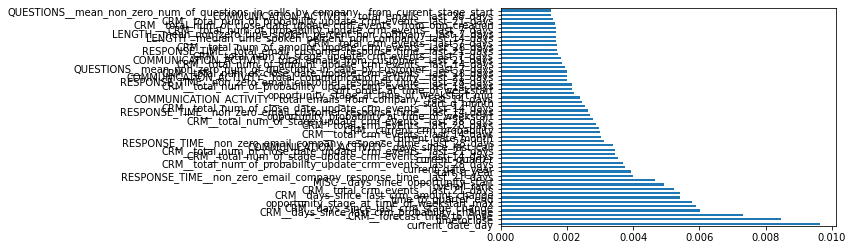

opportunity_id                                       0.000159
current_date_day                                     0.009632
current_date_month                                   0.003030
current_date_year                                    0.003740
TOPICS__mean_calls_Integration__from_opp_creation    0.000055
                                                       ...   
opportunity_stage_at_time_of_weekstart_max           0.005773
opportunity_stage_at_time_of_weekstart_min           0.002212
stage_transition                                     0.001439
current_quarter                                      0.003552
timetoclose                                          0.008467
Length: 2650, dtype: float64
552     1
110     0
1440    2
985     1
284     2
       ..
699     1
78      2
674     2
135     0
565     2
Name: target, Length: 478, dtype: int64
[1 1 2 1 2 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 2 2 2 0 1 1 1 0 2 2 1 2 2 2
 2 2 2 1 0 2 2 0 2 2 1 2 2 0 0 1 2 0 2 1 2 2 2 2 2 2 2 2 2 2 1 2

In [ ]:
# Before: normalize, pick features, train auto ML - 
# Now: pick features, normalize, train auto ML

df = pd.read_csv('train_data.csv')
df = df.fillna(method = 'bfill', axis=0).fillna(0) 
# pick features
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()
print(feat_importances)

# target values
X_feat = df[feat_importances.nlargest(50).index]

# normalize 
scaler = preprocessing.MinMaxScaler()

col = X_feat.columns
d = scaler.fit_transform(X_feat)
scaled_X = pd.DataFrame(d, columns=col) #transform back to dataframe
scaled_X.head()

# train 
# NN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=0.3,random_state=seed)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

print(y_test)
print(y_pred_test)

acc = accuracy_score(y_test, y_pred_test)
print("Accuracy: %.3f" % acc)
recall = recall_score(y_test, y_pred_test, average='micro')
print(recall)

In [ ]:
# check next step recipe site! 

# model : Consider running the example a few times and compare the average outcome

# Set up the end-to-end training/evaluation skeleton + get dumb baselines
- pick some simple model that you couldn’t possibly have screwed up somehow - e.g. a linear classifier, or a very tiny ConvNet
- train it, visualize the losses, any other metrics (e.g. accuracy), model predictions, and perform a series of ablation experiments with explicit hypotheses along the way
- check tips and tricks on website

http://karpathy.github.io/2019/04/25/recipe/

# Overfit + Regularize
- first get a model large enough that it can overfit (i.e. focus on training loss) and then regularize it appropriately (give up some training loss to improve the validation loss)
- check tips and tricks on website

# Tune
- random over grid search
- hyper parameter optimization

# Squeeze out the juice 
- ensembles
- leave it training